In [1]:
import numpy as np

In [2]:
a = np.array([1, 2])
b = np.array([[1, 2, 3], [1, 2, 3]])
a+b

ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

## Broadcasting
>The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations

## Inside a numpy array

### Dimensions


![arrayshapes.png](imgs/arrayshapes.png)

In [ ]:
a = np.ones((3, 3))
print(a)

In [ ]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    
print_info(a)

## Array operations

> NumPy operations are usually done on pairs of arrays on an element-by-element basis. Arrays of the same size are added element by element

In [ ]:
x = np.array([0, 2, 4, 6])
y = np.array([1, 3, 5, 7])
print(x)
print(y)

In [ ]:
x+y

in numpy, we can just as easily add a scalar to x

In [ ]:
print(x)

In [ ]:
x + 3 

In [ ]:
# I dont have to do this!!

#Make a new copy of array
#Loop through array and add 3
newx = x.copy()
for i in np.arange(x.size):
    newx[i] = newx[i] + 3
print('Inefficient', newx)

print()

#Stretch out 3 to the same shape of array
#Add x + 3
new3 = [3, 3, 3, 3]
x = x + new3
print('Inefficient', x)

## Broadcasting

We can think of broadcasting as an operation that stretches or duplicates the value 3 into the array [3, 3, 3, 3], and adds the results. 

The code in the first example is more efficient than that in the first because broadcasting moves less memory around during the addition (3 is a scalar rather than an array)

![broadcast_1D.png](imgs/broadcast_1D.png)

## 2D broadcasting

In [ ]:
a = np.array([1, 2, 3]) 
b = np.array([[4, 5, 6], [7, 8, 9]])

print(a)
print('')
print(b)

If I wanted to add a to each row of b

In [ ]:
a + b

In [ ]:
#I dont need to loop through each row of b and add a
print('Inefficient')
for i in b:
    print(i + a)

print()

print('Inefficient')
#Or repeat a to match the dimensions of b
newa = np.array([[1, 2, 3], [1, 2, 3]])
newa = np.tile(a, (2, 1))
print(newa+b)

![2dbroadcasting.png](imgs/2dbroadcasting.png)

The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

## Why does understanding broadcasting matter?
+ Efficient element wise operations with numpy
+ Simplifies code
+ Flexibly manipulate data
+ Understand broadcasting errors

<font size=9><strong>Three rules of Broadcasting</strong></font>

When operating on two arrays, NumPy compares their shapes.

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading LEFT side : **Pad**

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape : **Stretch**

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised : **Check**

<font size=9> Pad, Stretch, Check </font>

## Broadcasting example 1

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[4, 5, 6], [7, 8, 9]])

print(a)
print('')
print(b)

In [ ]:
print(a.shape)
print()
print(b.shape)

### Rule 1: Pad

>If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

a.shape -> (1, 3)

b.shape -> (2, 3)

### Rule 2: Stretch

> If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched or "broadcast" to match the other shape.


By rule 2, we now see that the first dimension disagrees, so we stretch this dimension in a to match:

a.shape -> (2, 3)

b.shape -> (2, 3)

The shapes match, and we see that the final shape will be (2, 3)

### Rule 3: Check

> If in any dimension the sizes disagree and neither is equal to 1, an error is raised : Check

In [ ]:
(a+b).shape

## Broadcasting example 2

In [ ]:
a = np.arange(20).reshape(5, 4)
b = np.ones(4)

In [ ]:
print(a.shape)
print()
print(b.shape)

In [ ]:
(a+b).shape

## Broadcasting example 3

In [ ]:
a = np.array([1, 2])[:, np.newaxis]
b = np.array([[4, 5, 6], [7, 8, 9]])

In [ ]:
#newaxis?

In [ ]:
print(a.shape)
print()
print(b.shape)

In [ ]:
(a+b).shape

## Broadcasting example 4

In [ ]:
a = np.arange(3)
b = np.arange(4).reshape(4, 1)

In [ ]:
print(a.shape)
print()
print(b.shape)

In [ ]:
(a+b).shape

## Broadcasting example 5

In [ ]:
a = np.ones((3, 2))
b = np.array([4, 5, 6])

In [ ]:
print(a.shape)
print()
print(b.shape)

In [ ]:
(a+b).shape

![Notcompatible.png](imgs/Notcompatible.png)

### Rule 3 : Check
>If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

But numpy should have just padded on the right....
>thats not how the broadcasting rules work! It would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array 

In [ ]:
a = np.ones((3, 2))
b = np.array([4, 5, 6])[:, np.newaxis]
# b = np.array([4, 5, 6]).reshape((3, 1))

In [ ]:
print(a.shape)
print()
print(b.shape)

In [ ]:
(a+b).shape

![newaxis.png](imgs/newaxis.png)

## Broadcasting example 6

These broadcasting rules apply to **any binary ufunc**

In [ ]:
a = np.ones((3, 2))
b = np.random.randint(1,10, (3, 1))
print(a.shape)
print(b.shape)
print((a/b).shape)

## Broadcasting Example 7
This can be translated to any number of dimensions

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): ????
```

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  ????
```

```
A      (3d array):  15 x 3 x 5
B      (2d array):       2 x 5
Result (3d array):  ????
```

### Recap

```
Scalar    2D           3D           Bad

( ,)     (3, 4)     (3, 5, 1)    (3, 5, 2)
(3,)     (3, 1)     (      8)    (      8)
----     ------     ---------    ---------
(3,)     (3, 4)     (3, 5, 8)       XXX
```

<font size=9> Hands-on exercises </font>

### Exercise1: warm up

```What is the expected output shape for each operation?```

In [5]:
a = np.arange(5)
b = 5

np.shape(a-b)==(5,)

True

In [10]:
a = np.ones((7, 1))
b = np.arange(7)
a*b

array([[0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.]])

In [11]:
a = np.random.randint(0, 50, (2, 3, 3))
b = np.random.randint(0, 10, (3, 1))

np.shape(a-b)==(2,3,3)

True

In [12]:
a = np.arange(100).reshape(10, 10)
b = np.arange(1, 10)

np.shape(a+b) == (10,10)

ValueError: operands could not be broadcast together with shapes (10,10) (9,) 

### Exercise 2:

```
1. Create a random 2D array of dimension (5, 3)
2. Calculate the maximum value of each row
3. Divide each row by its maximum
```

Remember to use broadcasting : NO FOR LOOPS!

In [20]:
## Your code here
import numpy as np
x = np.random.randint(0,10,(5,3))
print(x)
print(np.max(x,axis=1))
np.divide(x,np.max(x,axis=1).reshape(5,1))

[[2 0 4]
 [3 5 6]
 [0 1 5]
 [7 7 6]
 [2 0 2]]
[4 6 5 7 2]


array([[0.5       , 0.        , 1.        ],
       [0.5       , 0.83333333, 1.        ],
       [0.        , 0.2       , 1.        ],
       [1.        , 1.        , 0.85714286],
       [1.        , 0.        , 1.        ]])

### Exercise 3

Task: Find the closest **cluster** to the **observation**. 

Again, use broadcasting: DO NOT iterate cluster by cluster

In [21]:
observation = np.array([30.0, 99.0]) #Observation

#Clusters
clusters = np.array([[102.0, 203.0],
             [132.0, 193.0],
            [45.0, 155.0], 
            [57.0, 173.0]])

Lets plot this data

In the plot below, **+** is the observation and dots are the cluster coordinates

cluster 0
cluster 1
cluster 2
cluster 3


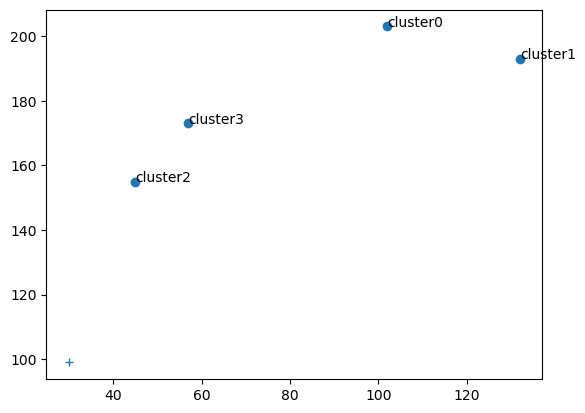

In [22]:
import matplotlib.pyplot as plt 

plt.scatter(clusters[:, 0], clusters[:, 1]) #Scatter plot of clusters
for n, x in enumerate(clusters):
    print('cluster %d' %n)
    plt.annotate('cluster%d' %n, (x[0], x[1])) #Label each cluster
plt.plot(observation[0], observation[1], '+'); #Plot observation

Closest cluster as seen by the plot is **2**. Your task is to write a function to calculate this


**hint:** Find the distance between the observation and each row in the cluster. The cluster to which the observation belongs to is the row with the minimum distance.

distance = $\sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$

In [30]:
## Your code here
np.argmin(np.sum((clusters -observation) ** 2,axis=1))


2

## Sources + Resources

ASPP 2016 - Stéfan van der Walt - https://github.com/ASPP/2016_numpy

Basic Numpy: http://scipy-lectures.org/intro/numpy/index.html

Advanced Numpy: http://scipy-lectures.org/advanced/advanced_numpy/index.html

Numpy chapter in "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html